<a href="https://colab.research.google.com/github/Eoli-an/Exam-topic-prediction/blob/main/WordFrequencyTranscribes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tika
!pip install textblob

  Created wheel for tika: filename=tika-1.24-py3-none-any.whl size=32893 sha256=11b476fa4a626667595136bbc7e129981f2a4438a72e0207b4a9b9caa20d8760
  Stored in directory: /root/.cache/pip/wheels/ec/2b/38/58ff05467a742e32f67f5d0de048fa046e764e2fbb25ac93f3
Successfully built tika


In [6]:
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from tika import parser
from textblob import TextBlob
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('brown')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

In [7]:
lectures_spoken = []
path = 'Transcribes/*.txt'
files=glob.glob(path)
for file in sorted(files):
    with open(file, 'r') as f:
        lectures_spoken.append(f.read())
lectures_spoken = " ".join(lectures_spoken)

In [8]:
blob_spoken = TextBlob(lectures_spoken)
freq_spoken = nltk.FreqDist(blob_spoken.noun_phrases)

In [9]:
relevant_words = ['bayes', 'frequentist', 'fairness', 'divergence', 'reproduc', 'regulariz', 'pca', 'principal c' 'bootstrap', 'nonlinear function', 'linear function', 'entropy', 'maximum likelihood estimat', 'significa', 'iid', 'bayes theorem', 'visualization', 'score function', 'dimensionality reduction', 'estimat', 'bayes', 'consumption', 'fisher', 'independence', 'logistic regression', 'bias', 'standard deviation', 'linear discriminant analysis', 'information matrix', 'null hypothesis', 'log likelihood', 'linear regression', 'hypothesis test', 'confidence', 'variance', 'sustainability', 'gaussian', 'linear model', 'climate', 'laplace', ]

In [10]:
def convert_to_template(df_element, template):
  for template_element in template:
    if template_element in df_element:
      return template_element
  return "None"


In [15]:
df = pd.DataFrame.from_dict({"word": list(freq_spoken.keys()), "freq_spoken" : list(freq_spoken.values())})
df["word"] = df["word"].apply(lambda x: convert_to_template(x,relevant_words))
df = df.groupby(["word"]).sum().reset_index()
df = df[df["word"] != "None"].reset_index()
df = df.sort_values(by="freq_spoken",ascending=False)

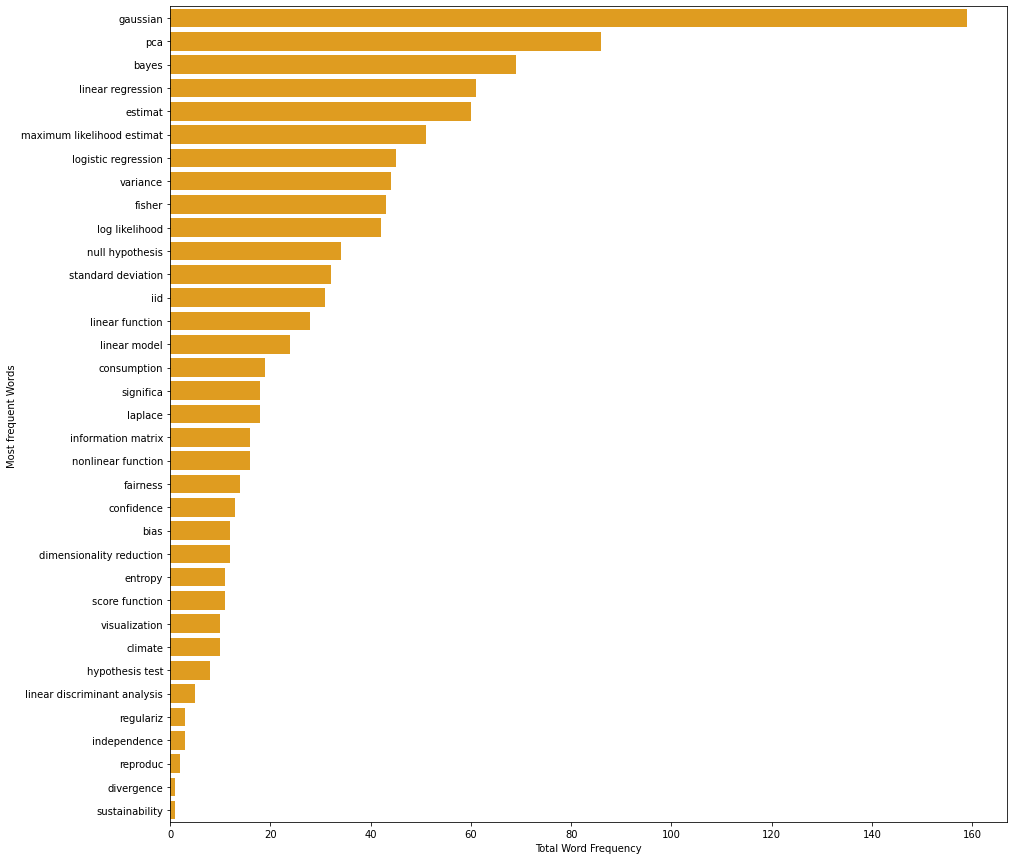

In [18]:
plt.figure(figsize =(15, 15))
sns.barplot(x="freq_spoken", y="word",data=df, color="orange",ci="sd")
plt.xlabel("Total Word Frequency")
plt.ylabel("Most frequent Words ")
plt.show()